# Project : Web Scraping of Indeed Job Portal 

In [1]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import csv
import time

urlhit = ['','&start=10', '&start=20']
jobType=input('Provide job title:?')
jobLocation=input('Provide job location:?')
file=jobType+'.csv'
JType = []
JD = []
Com = []
JTitle=[]
Pay = []
P_Date = []
data = {}
JC = []
JC1 = []

for i in urlhit:
    
    url= 'https://www.indeed.com.pk/jobs?q='+jobType+'&l='+jobLocation+''+str(i)
    html1 = requests.get(url)
    print (html1)
    time.sleep(5)
    soup = BeautifulSoup(html1.content, 'html.parser')
    
    jobtype= soup.find('div',  {'class': 'rbSection rbOpen', 'id' : 'rb_Job Type' })
    if jobtype is not None:
        cat  = jobtype.find_all('span', class_= 'rbLabel')
        for i in cat: 
            JC.append(i.text)
        cat1  = jobtype.find_all('span', class_= 'rbCount')
        for i in cat1: 
            JC1.append(i.text)

    lsts= soup.find_all('div',  class_ = 'unifiedRow')
    for e in lsts:
         
        jobTitle=e.find('a',class_='jobtitle')
        JTitle.append(jobTitle.text.strip())
        

        company=e.find('span',class_='company')
        if company is not None:
            Com.append(company.text.strip())
        
        
        JobDetail = e.find('div', class_ = 'summary')
        JD.append(JobDetail.text.strip())
        
        salary = e.find('span', class_ = 'salaryText')
        if salary is not None:
            Pay.append(salary.text.strip())
        Date = e.find('span' , class_ = 'date')
        if Date is not None:
            P_Date.append(Date.text.strip())


Provide job title:?sqa
Provide job location:?karachi
<Response [200]>
<Response [200]>
<Response [200]>


# Panadas DataFrame

In [2]:
s1=pd.Series(JTitle,name='JobTitle')
s2=pd.Series(Com,name='Company')
s3=pd.Series(JD,name='JobDetail')
s4=pd.Series(Pay,name='Salary')
s5=pd.Series(P_Date,name='PostDate')
df = pd.concat([s1,s2,s3,s4,s5], axis = 1)
df = df.replace(np.nan, '-', regex=True)
df


,JobTitle,Company,JobDetail,Salary,PostDate
0,SQA Engineer,Sidat Hyder Morshed Associates (Pvt) Ltd.,Should have an understanding of Functional and...,"Rs 6,000 a month",3 days ago
1,SQA Trainee,ivolve Technologies,We are looking for a fresh graduate to join th...,"Rs 45,000 - Rs 60,000 a month",14 days ago
2,SQA Engineer,Zeta Corp (Recruitment Agency),Candidate must have thorough experience in ERP...,"Rs 40,000 - Rs 55,000 a month",11 days ago
3,SQA engineer,Securiti.ai,Review product design documentation to ensure ...,"Rs 15,000 - Rs 40,000 a month",16 days ago
4,SQA Engineer (Manual),ART,We are looking for QA professionals who have e...,"Rs 40,000 - Rs 60,000 a month",17 days ago
5,Software Quality Assurance (SQA) Analyst,Ignite Solutions,Ignite Solutions is fast-growing highly repute...,"Rs 100,000 a month",30+ days ago
6,SQA Engineer,Leopards Courier Service Pvt. Ltd,"Following are the JD’s For SQA, kindly forward...",-,30+ days ago
7,Mid Level SQA,StartX,We are looking for a mid-level SQA Automation ...,-,18 days ago
8,SQA Interns,Bykea,Bykea Technologies is looking for SQA Interns....,-,17 days ago
9,Senior SQA Specialist,Veripark,Minimum 8 years of working experience.Minimum ...,-,10 days ago


# Save dataframe into csv file

In [3]:
# Save in CSV File
df.to_csv(file)


# Plotting 

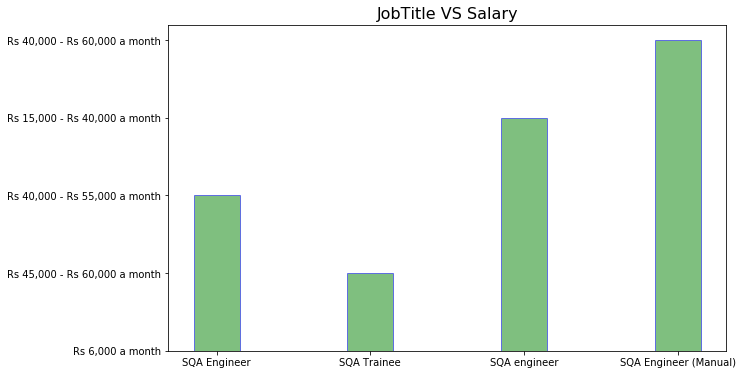

In [5]:
import matplotlib.pyplot as plt
import matplotlib
x = df.JobTitle.head()
y = df. Salary.astype(str).head()
plt.figure(figsize=(10,6))
plt.bar(x, y,  alpha=.5, color = 'g', edgecolor= 'b', width = .3)
plt.savefig('graph1.pdf')
plt.title("JobTitle VS Salary", fontsize=16)
plt.show()

In [6]:
import re
s7=pd.Series(JC,name = 'jobtype')
JCTemp=[]
for e in JC1:
    res = re.sub(r"[^0-9]","",e)
    JCTemp.append(int(res))
s8=pd.Series(JCTemp,name='Count')
df1 = pd.concat([s7,s8], axis=1)

df1


,jobtype,Count
0,Full-time,23
1,Contract,2
2,Internship,2


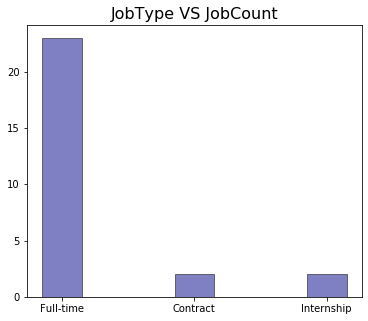

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt

x = df1.jobtype
y = df1.Count
plt.figure(figsize=(6,5))
plt.bar(x, y,alpha=.5,color = 'darkblue',edgecolor = 'black', width = .3)
plt.title("JobType VS JobCount",fontsize =16)


plt.show()
plt.savefig('graph2.pdf')

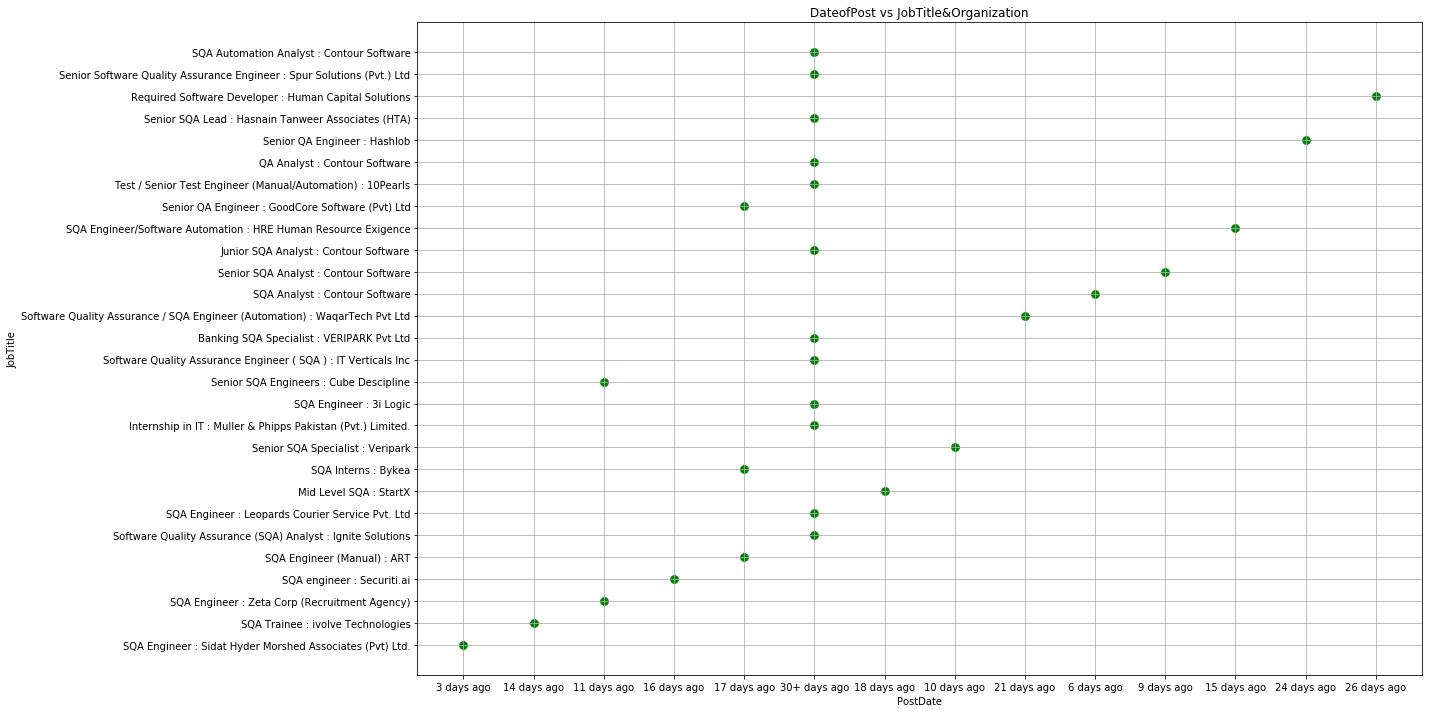

In [13]:
fig, ax = plt.subplots(figsize=(18, 12))
ax.scatter(df.PostDate,df.JobTitle+ " : "  + df.Company, marker = 'o', s=60, color = 'g')

ax.set(xlabel='PostDate', ylabel='JobTitle',
       title='DateofPost vs JobTitle&Organization')
ax.grid()
plt.savefig('graph3.pdf')
plt.show()

In [ ]:
()